### Importing required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Importing all csv files by just one command using 'os'

In [2]:
files=[file for file in os.listdir()]
print(files)

['.ipynb_checkpoints', 'Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv', 'Untitled.ipynb']


### Creating a empty dataframe then we will concat all the csv files into it

In [3]:
# creating an empty dataframe 'df'
all_data=pd.DataFrame()

### creating all_data file with all 12 months data

In [4]:
for file in files[1:len(files)-1]:
    data=pd.read_csv(file)
    all_data=pd.concat([all_data,data], ignore_index= True)

In [5]:
all_data.shape

(186850, 6)

# Task 01: cleaning data

### removing NaN values and special values which are not useful for our data

In [6]:
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [7]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
all_data=all_data.dropna()

In [9]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### So we have removed all NaN values from the dataframe but we do not know about special values we will know about it afterwards

# Task 02: converting Order Dates to timestamp!

In [10]:
# when we run this command to convert order date to timestamp 
# all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
# it shows this error 'Unknown string format: Order Date'
# it means there is some string which cannot be converted to time

In [11]:
all_data[all_data['Order Date']=='Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### now we found the error and we have to remove all these special values

In [12]:
# converting special values to nan values
all_data['Order Date']=all_data['Order Date'].replace('Order Date',np.NaN)

In [13]:
all_data.isnull().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each            0
Order Date          355
Purchase Address      0
dtype: int64

In [14]:
all_data=all_data.dropna()

In [15]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Yippieeeee!!! We have cleaned all data.

## converting order date to datess!

In [16]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [18]:
all_data['Order Date'][0]

Timestamp('2019-04-19 08:46:00')

In [19]:
type(all_data['Order Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
## creating a new column with months in it

In [21]:
all_data['month'] = pd.DatetimeIndex(all_data['Order Date']).month

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [23]:
## since the dataframe has starting month with 4th we have to sort it first
all_data=all_data.sort_values(by='Order Date')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1
76054,149343,Apple Airpods Headphones,1,150,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1


In [24]:
all_data=all_data.reset_index()

In [25]:
## adding a sales column
# all_data['sales']=all_data['Price Each']*all_data['Quantity Ordered']
# for this first we have to convert price and quantity to integer values

In [26]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)

In [27]:
all_data['sales']=all_data['Price Each']*all_data['Quantity Ordered']

In [28]:
all_data.head(1)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99


In [29]:
## checking unique values of months
month_list=all_data['month'].unique().tolist()

In [30]:
month_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [31]:
type(month_list[0])

int

In [32]:
type(all_data['month'][0])

numpy.int64

In [33]:
all_data['month']=all_data['month'].astype(int)

In [34]:
type(all_data['month'][0])

numpy.int32

the total sales in 1 is 1822256.73
the total sales in 2 is 2202022.42
the total sales in 3 is 2807100.38
the total sales in 4 is 3390670.2399999993
the total sales in 5 is 3152606.7499999995
the total sales in 6 is 2577802.26
the total sales in 7 is 2647775.76
the total sales in 8 is 2244467.88
the total sales in 9 is 2097560.13
the total sales in 10 is 3736726.88
the total sales in 11 is 3199603.2
the total sales in 12 is 4613443.339999999


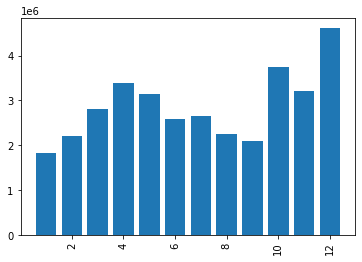

In [35]:
sales=[]
for m in month_list:
    print('the total sales in '+ str(m) +' is '+str(all_data[all_data['month']==m]['sales'].sum()))
    sales.append(all_data[all_data['month']==m]['sales'].sum())
plt.bar(month_list,sales)
plt.xticks(rotation='vertical')
plt.show()

## Which city sold the most product?

In [36]:
all_data.columns

Index(['index', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'month', 'sales'],
      dtype='object')

In [37]:
# first we have to add city column to our data

In [38]:
all_data['city']=all_data['Purchase Address'].str.split(',').str[1]

In [39]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City
1,74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco
2,76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City
3,76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas
4,76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta


In [40]:
group_bycity=all_data.groupby('city')

In [41]:
list_ofcity=all_data['city'].unique().tolist()

In [42]:
type(list_ofcity)

list

In [43]:
sales_percity=[]
for city in list_ofcity:
    print('total sales in '+ city + ' is ' +str(group_bycity.get_group(city)['sales'].sum()))
    sales_percity.append(group_bycity.get_group(city)['sales'].sum())

total sales in  New York City is 4664317.429999999
total sales in  San Francisco is 8262203.909999999
total sales in  Dallas is 2767975.4
total sales in  Atlanta is 2795498.58
total sales in  Boston is 3661642.0099999993
total sales in  Seattle is 2747755.4799999995
total sales in  Los Angeles is 5452570.799999999
total sales in  Portland is 2320490.61
total sales in  Austin is 1819581.7499999995


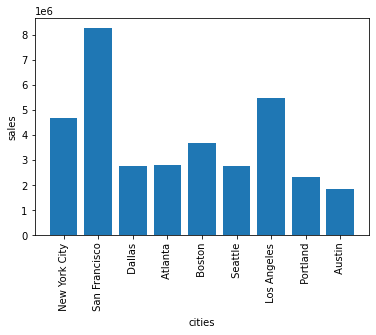

In [44]:
plt.bar(list_ofcity,sales_percity)
plt.xticks(rotation='vertical')
plt.xlabel("cities")
plt.ylabel('sales')
plt.show()

## What time should we display ads?

In [45]:
## first of all we have to make a column of bought_time
## for this first we have to extract time from order date column
# for this we have to import date time module
import datetime as dt

In [46]:
all_data['bought_time']=all_data['Order Date'].dt.hour

In [47]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,bought_time
0,73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City,3
1,74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco,3
2,76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City,4
3,76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas,5
4,76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta,6


In [48]:
all_data['bought_time'].nunique()

24

In [49]:
bought_time_list=all_data['bought_time'].unique().tolist()
bought_time_list.sort()

In [50]:
groupby_time=all_data.groupby('bought_time')

In [51]:
sales_perhour=[]
for time in bought_time_list:
    print('sales in this particular hour ' + str(time) + ' is '+ str(groupby_time.get_group(time)['sales'].sum()))
    sales_perhour.append(groupby_time.get_group(time)['sales'].sum())

sales in this particular hour 0 is 713721.27
sales in this particular hour 1 is 460866.88
sales in this particular hour 2 is 234851.44000000003
sales in this particular hour 3 is 145757.89
sales in this particular hour 4 is 162661.00999999998
sales in this particular hour 5 is 230679.81999999998
sales in this particular hour 6 is 448113.0
sales in this particular hour 7 is 744854.1199999999
sales in this particular hour 8 is 1192348.9699999997
sales in this particular hour 9 is 1639030.5799999998
sales in this particular hour 10 is 1944286.77
sales in this particular hour 11 is 2300610.2399999998
sales in this particular hour 12 is 2316821.34
sales in this particular hour 13 is 2155389.8
sales in this particular hour 14 is 2083672.7299999995
sales in this particular hour 15 is 1941549.5999999999
sales in this particular hour 16 is 1904601.31
sales in this particular hour 17 is 2129361.61
sales in this particular hour 18 is 2219348.3
sales in this particular hour 19 is 2412938.54
sales 

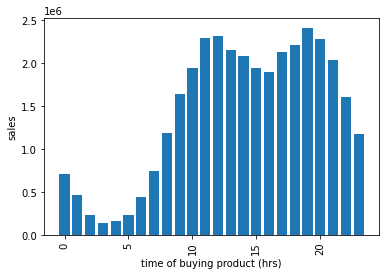

In [52]:
plt.bar(bought_time_list,sales_perhour)
plt.xticks(rotation='vertical')
plt.xlabel('time of buying product (hrs)')
plt.ylabel('sales')
plt.show()

#### So the sales is maximum at two peaks around 12 noon and 7:00 PM in the evening. This means people are more active at this time, so we should advertise at this time.

# What product are most often sold together?

In [53]:
# lets check how many different product are there in product list
all_data['Product'].nunique()

19

In [54]:
# so there are 19 different product

In [55]:
# lets check which of them are sold together. to check this we know that the items sold together must have same order id

In [56]:
# we will find the duplicates order id 
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [62]:
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda a:','.join(a))
df.head()

C:\Users\User\AppData\Local\Temp/ipykernel_6956/426880935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda a:','.join(a))


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,bought_time,grouped
11,71310,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,700.00,New York City,7,"iPhone,Wired Headphones"
12,71311,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,11.99,New York City,7,"iPhone,Wired Headphones"
65,74737,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,11.95,Atlanta,11,"USB-C Charging Cable,Google Phone"
66,74736,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,600.00,Atlanta,11,"USB-C Charging Cable,Google Phone"
79,75123,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",1,700.00,Dallas,12,"iPhone,Lightning Charging Cable"


In [71]:
df=df[['Order ID','grouped']]

In [72]:
df.head()

,Order ID,grouped
0,144804,"iPhone,Wired Headphones"
1,144804,"iPhone,Wired Headphones"
2,148074,"USB-C Charging Cable,Google Phone"
3,148074,"USB-C Charging Cable,Google Phone"
4,148450,"iPhone,Lightning Charging Cable"


In [74]:
df.shape

(14649, 2)

In [73]:
df['grouped'].nunique()

418

In [79]:
dic_of_highestsell=dict(df['grouped'].value_counts().head(8))

In [84]:
list_ofgrouped= list(dic_of_highestsell.keys())
list_ofgrouped

['Lightning Charging Cable,iPhone',
 'USB-C Charging Cable,Google Phone',
 'iPhone,Lightning Charging Cable',
 'Google Phone,USB-C Charging Cable',
 'Wired Headphones,iPhone',
 'iPhone,Wired Headphones',
 'Vareebadd Phone,USB-C Charging Cable',
 'Google Phone,Wired Headphones']

In [86]:
sell_ofgroup=list(dic_of_highestsell.values())
sell_ofgroup

[916, 906, 866, 830, 382, 366, 324, 312]

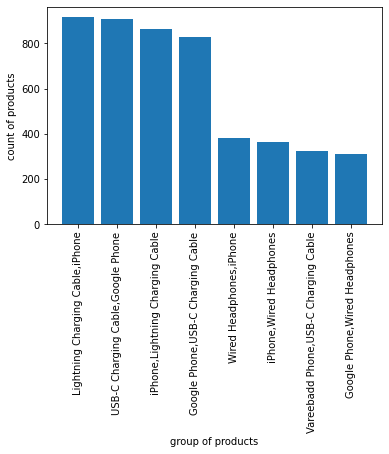

In [87]:
plt.bar(list_ofgrouped,sell_ofgroup)
plt.xlabel('group of products')
plt.ylabel('count of products')
plt.xticks(rotation='vertical')
plt.show()

#### so most buying pair product is lightning charging cable, iphone and further so we can say that people are willing to buy these product together and we can give offers on these combo product.

# what product sold the most?

In [90]:
#we can directly count the number of unique values
# so total product are
all_data['Product'].nunique()

19

In [116]:
dict_ofproduct=dict(all_data['Product'].value_counts().head(19))

In [117]:
list_ofproduct=list(dict_ofproduct.keys())

In [118]:
no_ofproducts=list(dict_ofproduct.values())

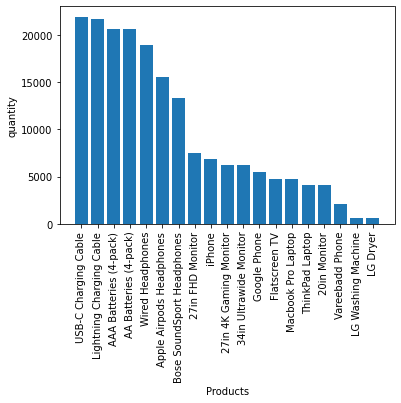

In [119]:
plt.bar(list_ofproduct,no_ofproducts)
plt.xlabel('Products')
plt.ylabel('quantity')
plt.xticks(rotation='vertical')
plt.show( )

In [120]:
# lets draw a graph with two y axis 'Price' and 'quantity'

In [121]:
list_ofproduct

['USB-C Charging Cable',
 'Lightning Charging Cable',
 'AAA Batteries (4-pack)',
 'AA Batteries (4-pack)',
 'Wired Headphones',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 '27in FHD Monitor',
 'iPhone',
 '27in 4K Gaming Monitor',
 '34in Ultrawide Monitor',
 'Google Phone',
 'Flatscreen TV',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 '20in Monitor',
 'Vareebadd Phone',
 'LG Washing Machine',
 'LG Dryer']

In [122]:
pricelist=[]
for product in list_ofproduct:
    price=all_data[all_data['Product']==product]['Price Each'].mean()
    pricelist.append(price)

In [123]:
pricelist

[11.95,
 14.949999999999996,
 2.990000000000001,
 3.840000000000001,
 11.990000000000002,
 150.0,
 99.99,
 149.99,
 700.0,
 389.98999999999995,
 379.9899999999999,
 600.0,
 300.0,
 1700.0,
 999.9899999999999,
 109.99,
 400.0,
 600.0,
 600.0]

C:\Users\User\AppData\Local\Temp/ipykernel_6956/1489266620.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list_ofproduct,rotation='vertical',size=10)


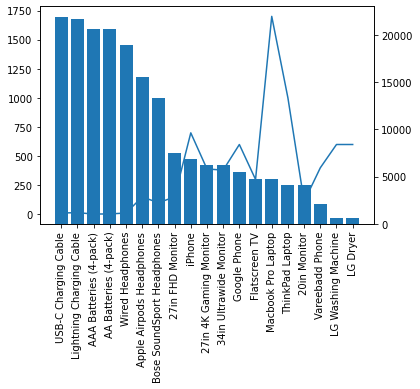

In [126]:
fig, ax1= plt.subplots()
ax2=ax1.twinx()
ax1.plot(list_ofproduct,pricelist)
ax2.bar(list_ofproduct,no_ofproducts)
ax1.set_xticklabels(list_ofproduct,rotation='vertical',size=10)
plt.show()

## we can say that people are afraid to buy expensive product and cheap product are easily buying